In [273]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *



from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [274]:
df_left = pd.read_csv('data/merged/look_left.csv')
df_right = pd.read_csv('data/merged/look_right.csv')
### hack
# Assume class 0 is always when face is forward for any data set
df_right['class'] = df_right['class'].apply(lambda x: x + 2 if x > 0 else 0)
df_cat = pd.concat([df_left, df_right])
df_multi = pd.read_csv('data/merged/multi_look.csv')
df_bob = pd.read_csv('data/merged/head_bob.csv')

ignore_cols =['time', 'noseX_raw', 'class', 'noseY_raw']

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

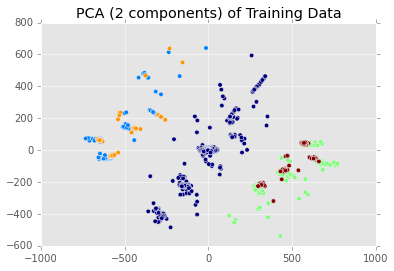

In [275]:
pca = PCA(n_components=2)
cols = df_cat.columns.values.tolist()
cols.remove('time')
cols.remove('noseX_raw')
cols.remove('noseY_raw')
cols.remove('class')
X = pca.fit_transform(df_cat[cols].fillna(0))

plt.scatter(X[:,0], X[:,1],c=df_cat['class'])
plt.title('PCA (2 components) of Training Data')

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=10)
active_cols = df_cat.columns.values.tolist()
for c in ignore_cols:
    active_cols.remove(c)
svm.fit(df_cat[active_cols], df_cat['class'])
knn.fit(df_cat[active_cols], df_cat['class'])

In [276]:
Y = knn.predict(df_multi[active_cols])
df_multi['class'] = Y

Y = knn.predict(df_bob[active_cols])
df_bob['class'] = Y


In [277]:
def plot_pca_and_labeled_series(df, y_col, ignore_cols=[]):
    pca = PCA(n_components=2)
    cols = df.columns.values.tolist()
    for c in ignore_cols:
        cols.remove(c)
    X = pca.fit_transform(df[cols].fillna(0))
    plt.scatter(X[:,0], X[:,1],c=df['class'])
    plt.title('PCA (2 components) of Windowed Data')
    plt.figure()
    plt.figure(figsize =(10,3))
    plt.scatter(df.index, df[y_col], c=df['class'])
    plt.title('Data of Nose Position with Classified Using KNN')
    plt.ylabel('Nose Position X')
    plt.xlabel('Index')

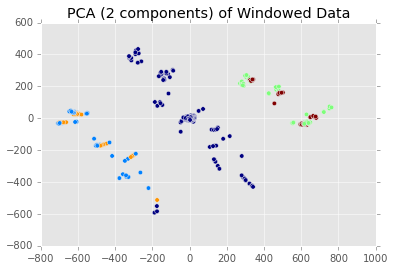

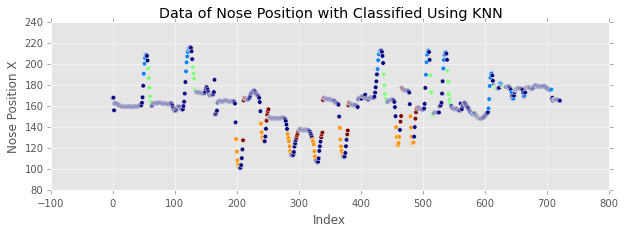

In [278]:
# Classifier against full head turns, going left to right
plot_pca_and_labeled_series(df_multi, 'noseX_raw', ignore_cols=ignore_cols)

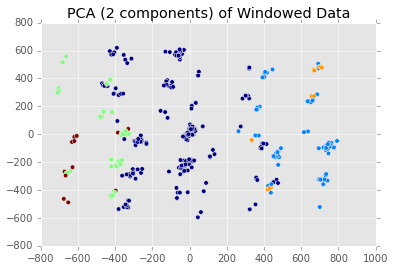

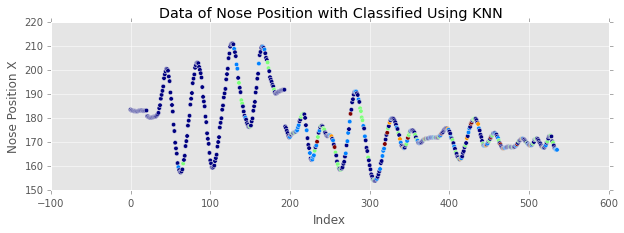

In [279]:
# Classifier against head bobs, (no TRUE full rotations)
plot_pca_and_labeled_series(df_bob, 'noseX_raw', ignore_cols=ignore_cols)

In [280]:
# training features
df_cat

,faceBottom_1_steps,faceBottom_1_steps_0,faceBottom_1_steps_1,faceBottom_1_steps_2,faceBottom_6_steps,faceBottom_6_steps_0,faceBottom_6_steps_1,faceBottom_6_steps_2,faceLeft_1_steps,faceLeft_1_steps_0,...,noseY_1_steps_0,noseY_1_steps_1,noseY_1_steps_2,noseY_6_steps,noseY_6_steps_0,noseY_6_steps_1,noseY_6_steps_2,noseY_raw,time,class
0,0,0,0,-1,0,0,0,0,0,0,...,0.000000,0.165146,0.004074,0.000000,0.000000,0.000000,0.000000,138.445755,1.448679e+09,0
1,0,0,-1,2,0,0,0,0,1,1,...,0.165146,0.004074,-0.008835,0.000000,0.000000,0.000000,0.000000,138.610901,1.448679e+09,0
2,-1,-1,2,-2,0,0,0,0,1,1,...,0.004074,-0.008835,-0.021820,0.000000,0.000000,0.000000,0.000000,138.614975,1.448679e+09,0
3,2,2,-2,0,0,0,0,0,-1,-1,...,-0.008835,-0.021820,0.010834,0.000000,0.000000,0.000000,0.000000,138.606140,1.448679e+09,0
4,-2,-2,0,0,0,0,0,-1,0,0,...,-0.021820,0.010834,0.057053,0.000000,0.000000,0.000000,0.206451,138.584320,1.448679e+09,0
5,0,0,0,5,0,0,-1,4,1,1,...,0.010834,0.057053,0.252380,0.000000,0.000000,0.206451,0.293686,138.595154,1.448679e+09,0
6,0,0,5,-2,-1,-1,4,3,0,0,...,0.057053,0.252380,0.108505,0.206451,0.206451,0.293686,0.398117,138.652206,1.448679e+09,0
7,5,5,-2,0,4,4,3,1,-3,-3,...,0.252380,0.108505,0.173615,0.293686,0.293686,0.398117,0.580566,138.904587,1.448679e+09,0
8,-2,-2,0,-1,3,3,1,2,2,2,...,0.108505,0.173615,0.106934,0.398117,0.398117,0.580566,0.709320,139.013092,1.448679e+09,0
9,0,0,-1,-2,1,1,2,0,-1,-1,...,0.173615,0.106934,0.058899,0.580566,0.580566,0.709320,0.757385,139.186707,1.448679e+09,0


In [281]:
df_cat.columns.values

array(['faceBottom_1_steps', 'faceBottom_1_steps_0',
       'faceBottom_1_steps_1', 'faceBottom_1_steps_2',
       'faceBottom_6_steps', 'faceBottom_6_steps_0',
       'faceBottom_6_steps_1', 'faceBottom_6_steps_2', 'faceLeft_1_steps',
       'faceLeft_1_steps_0', 'faceLeft_1_steps_1', 'faceLeft_1_steps_2',
       'faceLeft_6_steps', 'faceLeft_6_steps_0', 'faceLeft_6_steps_1',
       'faceLeft_6_steps_2', 'faceRight_1_steps', 'faceRight_1_steps_0',
       'faceRight_1_steps_1', 'faceRight_1_steps_2', 'faceRight_6_steps',
       'faceRight_6_steps_0', 'faceRight_6_steps_1', 'faceRight_6_steps_2',
       'faceTop_1_steps', 'faceTop_1_steps_0', 'faceTop_1_steps_1',
       'faceTop_1_steps_2', 'faceTop_6_steps', 'faceTop_6_steps_0',
       'faceTop_6_steps_1', 'faceTop_6_steps_2', 'isFrontFace_1_steps',
       'isFrontFace_1_steps_0', 'isFrontFace_1_steps_1',
       'isFrontFace_1_steps_2', 'isFrontFace_6_steps',
       'isFrontFace_6_steps_0', 'isFrontFace_6_steps_1',
       'isFrontFace_